In [5]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import math
import random

In [89]:
data = pd.read_csv("i.csv")[:721]

In [90]:
data.loc[data.Id == 1,"Id"] = 0
data.loc[data.Id == 2,"Id"] = 1
data["day"] = [(int(i.split("/")[0])-2) for i in data.Time.tolist()]
data["minitues"] = list(range(103))*7
data["time_step"] = list(range(721))

In [91]:
weather = [0]*400 + [1]*171 + [2]*150  
random.shuffle(weather)
data["weather"] = weather

In [92]:
festival = [0]*716 + [1]*5
random.shuffle(festival)
data["festival"] = festival

In [96]:
data["NumOfFree"] = data["I"] -  data["weather"]*10  + data["festival"]*20 + random.randint(-3,3)

In [74]:
data

,Id,Time,I,day,minitues,time_step,weather,festival,I_w
0,0,02/12/2019 6:00,169,0,0,0,0,0,172
1,0,02/12/2019 6:10,170,0,1,1,0,0,173
2,0,02/12/2019 6:20,172,0,2,2,0,0,175
3,0,02/12/2019 6:30,170,0,3,3,1,0,168
4,0,02/12/2019 6:40,169,0,4,4,0,0,172
...,...,...,...,...,...,...,...,...,...
716,0,08/12/2019 22:20,172,6,98,716,0,1,185
717,0,08/12/2019 22:30,176,6,99,717,0,0,179
718,0,08/12/2019 22:40,177,6,100,718,0,0,180
719,0,08/12/2019 22:50,174,6,101,719,0,0,177


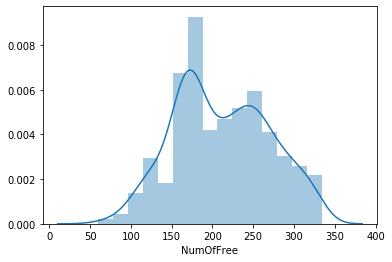

In [123]:
sns.distplot(data['NumOfFree'])
plt.savefig("空位分布.png")

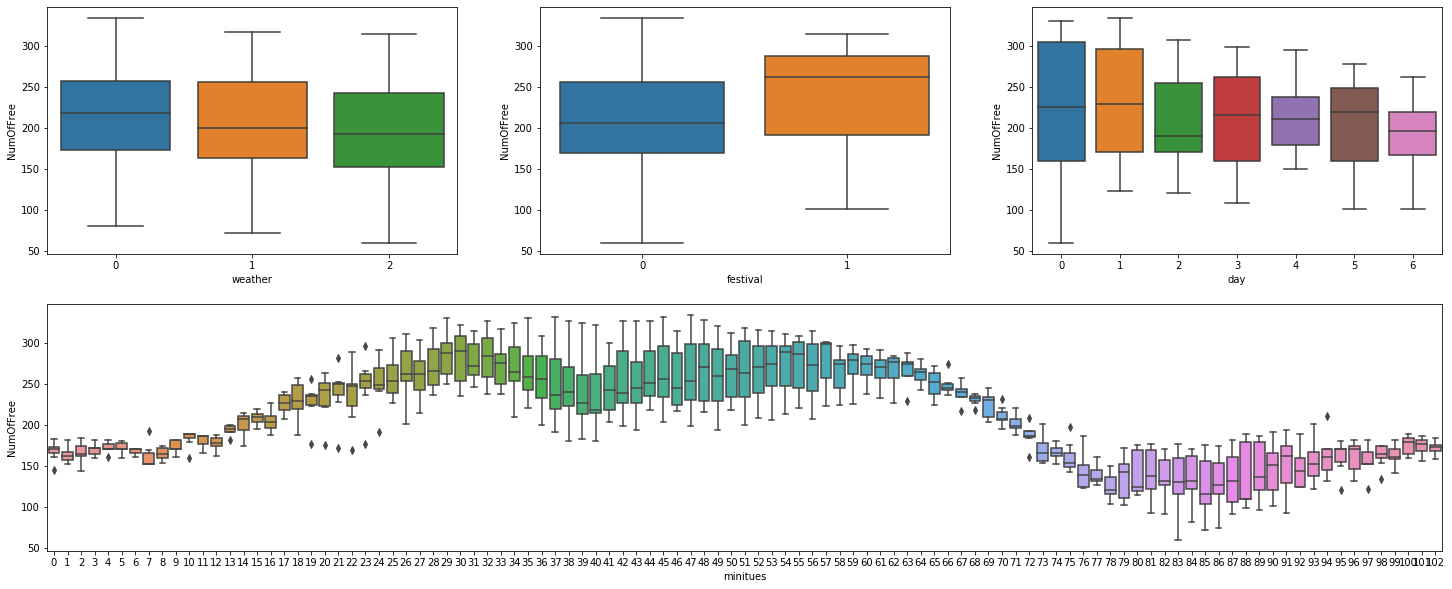

In [132]:
plt.figure(figsize=(25,10))
plt.subplot(231)
sns.boxplot(x="weather", y="NumOfFree", data=data)
plt.subplot(232)
sns.boxplot(x="festival", y="NumOfFree", data=data)
plt.subplot(233)
sns.boxplot(x="day", y="NumOfFree", data=data)
plt.subplot(212)
sns.boxplot(x="minitues", y="NumOfFree", data=data)
plt.savefig("相关性_箱型图.png")

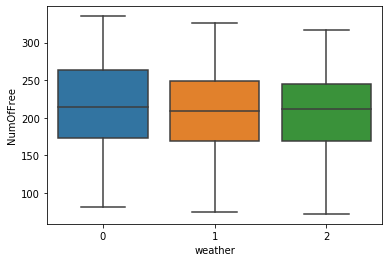

In [81]:
sns.boxplot(x="weather", y="NumOfFree", data=data)

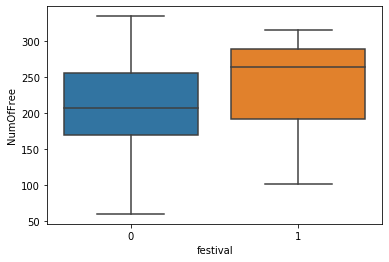

In [121]:
sns.boxplot(x="festival", y="NumOfFree", data=data)

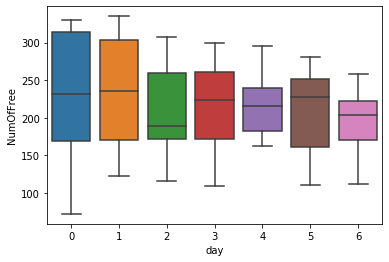

In [83]:
sns.boxplot(x="day", y="NumOfFree", data=data)

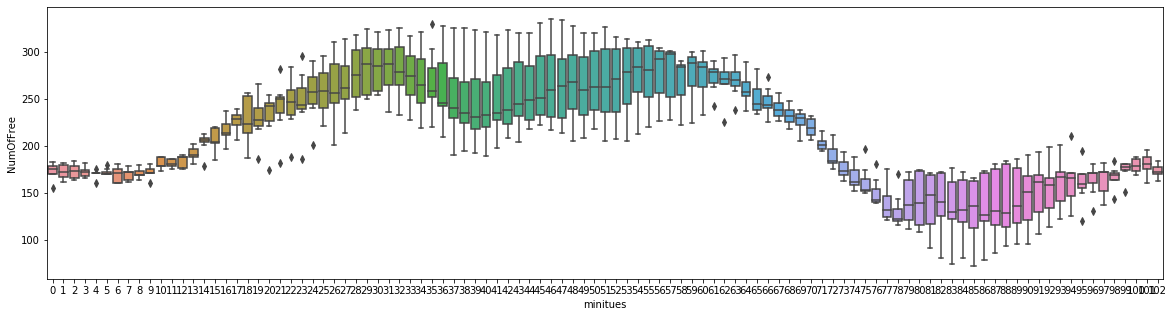

In [87]:
plt.figure(figsize = (20,5))
sns.boxplot(x="minitues", y="NumOfFree", data=data)

In [98]:
data.columns

Index(['Id', 'Time', 'I', 'day', 'minitues', 'time_step', 'weather',
       'festival', 'NumOfFree'],
      dtype='object')

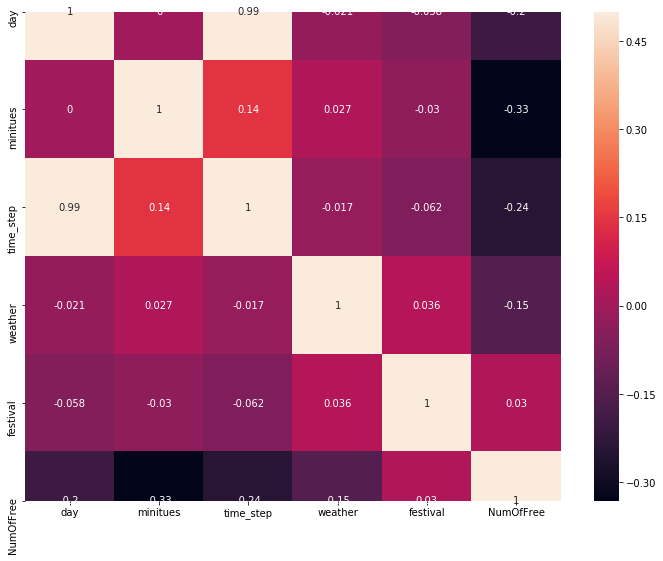

In [119]:
cols = [ 'Time', 'day', 'minitues', 'time_step', 'weather',
       'festival', 'NumOfFree']
corrmat = data[cols].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat,annot=True, vmax=.5)
plt.savefig("heatmap.png")

C:\Users\xps\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


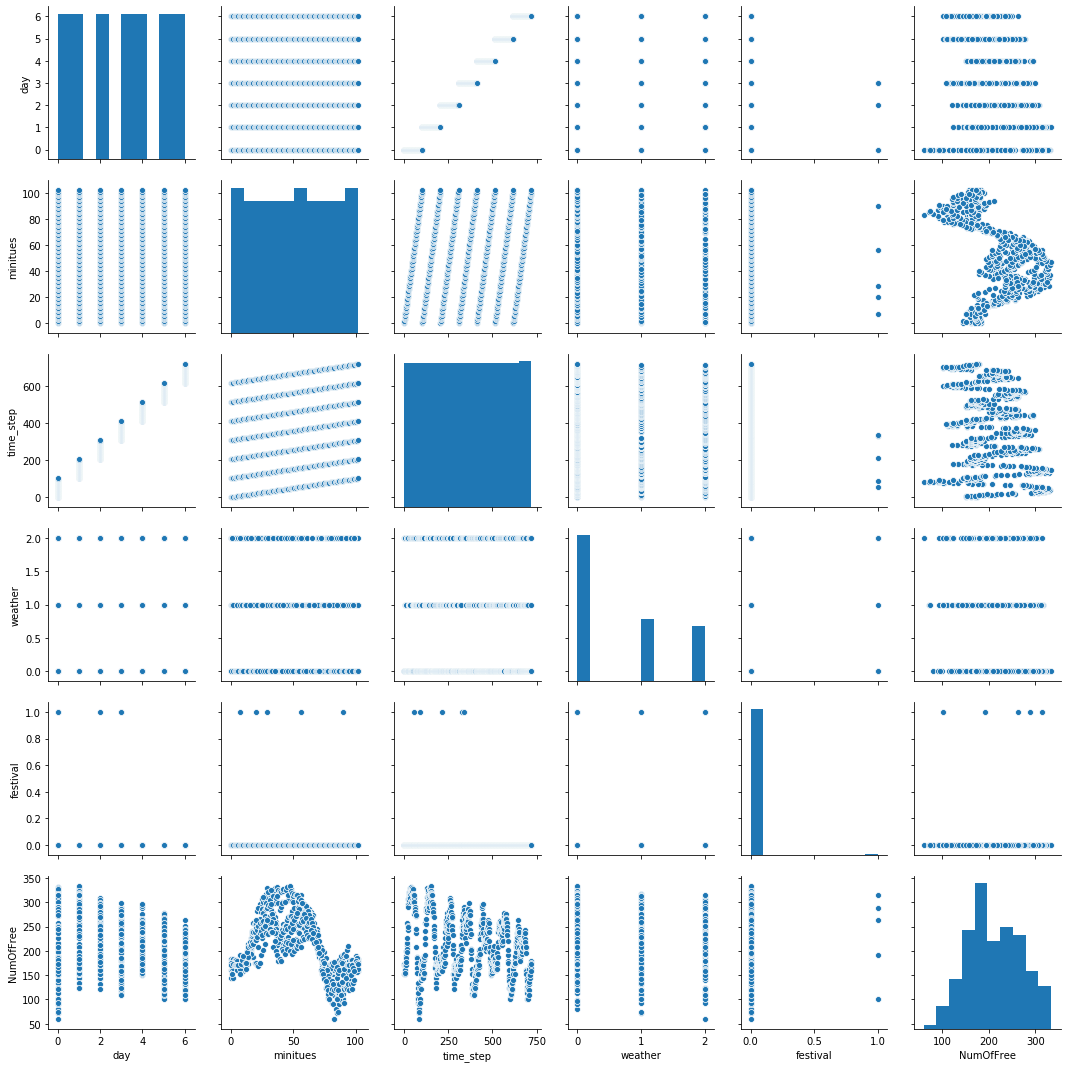

In [122]:
cols = [ 'Time', 'day', 'minitues', 'time_step', 'weather',
       'festival', 'NumOfFree']
sns.pairplot(data[cols], size = 2.5)
plt.savefig("相关性_一对一.png")